In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
ds=pd.read_csv('bank-direct-marketing-campaigns.csv')

In [6]:
ds

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
print(ds.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

In [8]:
ds['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

# Data Processing

# Check For Missing Values

In [9]:
# Check for missing values
missing_values = ds.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

ValueError: ignored

<Figure size 800x600 with 0 Axes>

In [11]:
ds.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of          age    job  marital  education  default  housing   loan  contact  \
0      False  False    False      False    False    False  False    False   
1      False  False    False      False    False    False  False    False   
2      False  False    False      False    False    False  False    False   
3      False  False    False      False    False    False  False    False   
4      False  False    False      False    False    False  False    False   
...      ...    ...      ...        ...      ...      ...    ...      ...   
41183  False  False    False      False    False    False  False    False   
41184  False  False    False      False    False    False  False    False   
41185  False  False    False      False    False    False  False    False   
41186  False  False    False      False    False    False  False    False   
41187  False  False    False      False    False    False  False    False   

       month 

In [12]:
# Check for and remove duplicates
print("Number of duplicates before removing:", ds.duplicated().sum())
ds = ds.drop_duplicates()
print("Number of duplicates after removing:", ds.duplicated().sum())

Number of duplicates before removing: 1784
Number of duplicates after removing: 0


In [13]:
# Check for missing data (non-null but potentially incorrect or placeholder values)
missing_data = ds.isin(['unknown', 'other', '999']).sum()
print("\nMissing Data (e.g., 'unknown', 'other', '999'):")
print(missing_data)


Missing Data (e.g., 'unknown', 'other', '999'):
age                  0
job                325
marital             79
education         1686
default           8266
housing            980
loan               980
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [14]:
# Check the distribution of the target classes
print(ds['y'].value_counts())


no     34806
yes     4598
Name: y, dtype: int64


# **# **Encode Categorical Values****

In [15]:
# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ds.select_dtypes(include=['object']).columns

for col in categorical_columns:
    ds[col] = label_encoder.fit_transform(ds[col])

<ipython-input-15-abc69b2e0d73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[col] = label_encoder.fit_transform(ds[col])
<ipython-input-15-abc69b2e0d73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[col] = label_encoder.fit_transform(ds[col])
<ipython-input-15-abc69b2e0d73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [16]:
# Display the first few rows after encoding
print("\nEncoded Dataset:")
print(ds.head())



Encoded Dataset:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
1            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191

In [17]:
ds

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
ds=ds.drop(['pdays'], axis=1)

# **Balance the in inbalanced data**

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'ds' is your original dataset
# X should contain the features, and 'y' should be the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ds['y'], test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Concatenate the synthetic samples with the original training set
X_train_balanced = pd.concat([X_train, X_train_smote], axis=0)
y_train_balanced = pd.concat([y_train, y_train_smote], axis=0)

# Now, X_train_balanced and y_train_balanced contain the balanced training set


In [37]:
# Assuming 'y_train_balanced' is the target variable after oversampling

# Display the class distribution after oversampling
print(y_train_balanced.value_counts())


0    55686
1    31523
Name: y, dtype: int64


In [20]:
# Assuming 'ds' is your DataFrame
# Check for duplicates in the entire DataFrame
duplicates = ds.duplicated()

# Print the count of duplicate rows
print("Number of duplicate rows: {}".format(duplicates.sum()))

# If you want to display the duplicate rows, you can use:
# duplicate_rows = ds[duplicates]
# print(duplicate_rows)


Number of duplicate rows: 11


In [21]:
# Assuming 'ds' is your DataFrame
# Remove duplicates based on specific columns (excluding 'y' column)
ds_no_duplicates = ds.drop_duplicates(subset=ds.columns.difference(['y']))

# Print the shape of the DataFrame before and after removing duplicates
print("Shape before removing duplicates: {}".format(ds.shape))
print("Shape after removing duplicates: {}".format(ds_no_duplicates.shape))


Shape before removing duplicates: (39404, 19)
Shape after removing duplicates: (39154, 19)


In [22]:
# Impute missing numeric values with the mean
numerical_imputer = SimpleImputer(strategy='mean')
ds['age'] = numerical_imputer.fit_transform(ds[['age']])

In [23]:
# Impute missing categorical values with the most frequent category for other columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in categorical_columns:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    ds[col] = categorical_imputer.fit_transform(ds[[col]])

In [24]:
# Treat missing binary values as a separate category
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    ds[col] = ds[col].fillna('unknown')


In [25]:
# Replace '999' with NaN in relevant columns
categorical_999_columns = [ 'previous', 'poutcome']
ds[categorical_999_columns] = ds[categorical_999_columns].replace('999', pd.NA)

In [26]:
# Replace 'unknown' and 'other' with NaN
ds.replace(['unknown', 'other'], pd.NA, inplace=True)

In [27]:
# Impute missing categorical values with the most frequent category
categorical_imputer = SimpleImputer(strategy='most_frequent')
ds[['job', 'marital', 'education']] = categorical_imputer.fit_transform(ds[['job', 'marital', 'education']])


In [28]:
# Verify that missing values are handled
missing_values_after_imputation = ds.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after_imputation)


Missing Values After Imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# **Splitting the dataset**

In [29]:
# Define features (X) and target variable (y)
X = ds.drop('y', axis=1)  # Features
y = ds['y']  # Target variable

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
  # Display the shapes of the training and testing sets
  print("\nShapes of Training and Testing Sets:")
  print("X_train:", X_train.shape)
  print("X_test:", X_test.shape)
  print("y_train:", y_train.shape)
  print("y_test:", y_test.shape)


Shapes of Training and Testing Sets:
X_train: (31523, 18)
X_test: (7881, 18)
y_train: (31523,)
y_test: (7881,)


# **Initialize the Random Forest Classifier**

In [33]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20)

In [34]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

In [35]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [39]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8407562492069535
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6963
           1       0.13      0.06      0.08       918

    accuracy                           0.84      7881
   macro avg       0.51      0.50      0.50      7881
weighted avg       0.80      0.84      0.82      7881



# **Implement the GridSearch For RandomForest**




In [40]:
from sklearn.model_selection import GridSearchCV

# Example grid search for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=20), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hype9rparameters:", best_params)


Best Hype9rparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [41]:
from sklearn.model_selection import cross_val_score

# Example cross-validation for RandomForestClassifier
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
from sklearn.model_selection import cross_val_score

# Example cross-validation for RandomForestClassifier
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.89056305 0.88961142 0.88643933 0.88721447 0.88800761]
Cross-Validation Scores: [0.89056305 0.88961142 0.88643933 0.88721447 0.88800761]


In [42]:
# Example feature importance for RandomForestClassifier
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Sort features by importance
feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Display sorted feature importance
print("Feature Importance:")
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance}")

Feature Importance:
age: 0.1844425872457397
euribor3m: 0.14863781224646397
job: 0.08530605346222946
campaign: 0.08421428500890636
education: 0.07664367971590824
nr.employed: 0.06385173468668469
day_of_week: 0.06010527240220074
poutcome: 0.05059940651756012
marital: 0.04154819333671723
housing: 0.03787653650172282
loan: 0.026985098739337875
cons.conf.idx: 0.023849256817518167
emp.var.rate: 0.023630328557460025
cons.price.idx: 0.022844627805147132
previous: 0.02059927841867218
month: 0.01817733775486124
contact: 0.01574914669016641
default: 0.014939364092703664


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Train RandomForestClassifier without handling imbalanced classes
rf_classifier_before = RandomForestClassifier(n_estimators=100, random_state=20)
rf_classifier_before.fit(X_train_scaled, y_train)
y_pred_before = rf_classifier_before.predict(X_test_scaled)

# Evaluate the model before handling
accuracy_before = accuracy_score(y_test, y_pred_before)
classification_rep_before = classification_report(y_test, y_pred_before)
conf_matrix_before = confusion_matrix(y_test, y_pred_before)

print("Before Handling Imbalanced Classes:")
print(f"Accuracy: {accuracy_before}")
print("Classification Report:\n", classification_rep_before)
print("Confusion Matrix:\n", conf_matrix_before)

# Apply RandomUnderSampler to handle imbalanced classes
sampler = RandomUnderSampler(random_state=20)
X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

# Train RandomForestClassifier after handling imbalanced classes
rf_classifier_after = RandomForestClassifier(n_estimators=100, random_state=20)
rf_classifier_after.fit(X_resampled, y_resampled)
y_pred_after = rf_classifier_after.predict(X_test_scaled)

# Evaluate the model after handling
accuracy_after = accuracy_score(y_test, y_pred_after)
classification_rep_after = classification_report(y_test, y_pred_after)
conf_matrix_after = confusion_matrix(y_test, y_pred_after)

print("\nAfter Handling Imbalanced Classes:")
print(f"Accuracy: {accuracy_after}")
print("Classification Report:\n", classification_rep_after)
print("Confusion Matrix:\n", conf_matrix_after)


Before Handling Imbalanced Classes:
Accuracy: 0.8845324197436873
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      6963
           1       0.51      0.29      0.37       918

    accuracy                           0.88      7881
   macro avg       0.71      0.63      0.65      7881
weighted avg       0.86      0.88      0.87      7881

Confusion Matrix:
 [[6706  257]
 [ 653  265]]

After Handling Imbalanced Classes:
Accuracy: 0.772744575561477
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      6963
           1       0.29      0.64      0.40       918

    accuracy                           0.77      7881
   macro avg       0.62      0.71      0.63      7881
weighted avg       0.87      0.77      0.81      7881

Confusion Matrix:
 [[5503 1460]
 [ 331  587]]


# **Logistic Regression Model**

In [45]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Train the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=20)
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=20)

In [48]:
# Make Predictions on the Test Set
y_pred = logistic_regression_model.predict(X_test_scaled)

In [49]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [50]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train_scaled, y_train are your training features and labels
logistic_regression_model = LogisticRegression(class_weight='balanced', random_state=20)
logistic_regression_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=20)

In [51]:
from sklearn.metrics import classification_report

y_pred = logistic_regression_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6963
           1       0.32      0.62      0.42       918

    accuracy                           0.80      7881
   macro avg       0.63      0.72      0.65      7881
weighted avg       0.87      0.80      0.83      7881



In [52]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
# Evaluate the model after handling
accuracy_after = accuracy_score(y_test, y_pred_after)
classification_rep_after = classification_report(y_test, y_pred_after)
conf_matrix_after = confusion_matrix(y_test, y_pred_after)

print("\nAfter Handling Imbalanced Classes:")
print(f"Accuracy: {accuracy_after}")
print("Classification Report:\n", classification_rep_after)
print("Confusion Matrix:\n", conf_matrix_after)


Accuracy: 0.894175866006852
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.64      0.21      0.32       918

    accuracy                           0.89      7881
   macro avg       0.77      0.60      0.63      7881
weighted avg       0.87      0.89      0.87      7881

Confusion Matrix:
 [[6855  108]
 [ 726  192]]

After Handling Imbalanced Classes:
Accuracy: 0.772744575561477
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      6963
           1       0.29      0.64      0.40       918

    accuracy                           0.77      7881
   macro avg       0.62      0.71      0.63      7881
weighted avg       0.87      0.77      0.81      7881

Confusion Matrix:
 [[5503 1460]
 [ 331  587]]


In [53]:
from sklearn.model_selection import GridSearchCV

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=20)

# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create the grid search object
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy with Best Model:", accuracy_best)
print("Classification Report with Best Model:\n", classification_rep_best)
print("Confusion Matrix with Best Model:\n", conf_matrix_best)


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy with Best Model: 0.8944296409085142
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6963
           1       0.65      0.21      0.31       918

    accuracy                           0.89      7881
   macro avg       0.78      0.60      0.63      7881
weighted avg       0.87      0.89      0.87      7881

Confusion Matrix with Best Model:
 [[6860  103]
 [ 729  189]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [54]:
# Before handling imbalanced classes with Logistic Regression
logistic_regression_model_before = LogisticRegression(random_state=20)
logistic_regression_model_before.fit(X_train_scaled, y_train)
y_pred_before_lr = logistic_regression_model_before.predict(X_test_scaled)

# Evaluate the Logistic Regression model before handling
accuracy_before_lr = accuracy_score(y_test, y_pred_before_lr)
classification_rep_before_lr = classification_report(y_test, y_pred_before_lr)
conf_matrix_before_lr = confusion_matrix(y_test, y_pred_before_lr)

print("Before Handling Imbalanced Classes with Logistic Regression:")
print(f"Accuracy: {accuracy_before_lr}")
print("Classification Report:\n", classification_rep_before_lr)
print("Confusion Matrix:\n", conf_matrix_before_lr)

# Apply RandomUnderSampler to handle imbalanced classes
sampler = RandomUnderSampler(random_state=20)
X_resampled_lr, y_resampled_lr = sampler.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression after handling imbalanced classes
logistic_regression_model_after = LogisticRegression(random_state=20)
logistic_regression_model_after.fit(X_resampled_lr, y_resampled_lr)
y_pred_after_lr = logistic_regression_model_after.predict(X_test_scaled)

# Evaluate the Logistic Regression model after handling
accuracy_after_lr = accuracy_score(y_test, y_pred_after_lr)
classification_rep_after_lr = classification_report(y_test, y_pred_after_lr)
conf_matrix_after_lr = confusion_matrix(y_test, y_pred_after_lr)

print("\nAfter Handling Imbalanced Classes with Logistic Regression:")
print(f"Accuracy: {accuracy_after_lr}")
print("Classification Report:\n", classification_rep_after_lr)
print("Confusion Matrix:\n", conf_matrix_after_lr)

Before Handling Imbalanced Classes with Logistic Regression:
Accuracy: 0.894175866006852
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.64      0.21      0.32       918

    accuracy                           0.89      7881
   macro avg       0.77      0.60      0.63      7881
weighted avg       0.87      0.89      0.87      7881

Confusion Matrix:
 [[6855  108]
 [ 726  192]]

After Handling Imbalanced Classes with Logistic Regression:
Accuracy: 0.7981220657276995
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      6963
           1       0.32      0.63      0.42       918

    accuracy                           0.80      7881
   macro avg       0.63      0.72      0.65      7881
weighted avg       0.87      0.80      0.82      7881

Confusion Matrix:
 [[5716 1247]
 [ 344  574]]


In [55]:
#Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM Model

In [56]:
# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=20)  # Use 'linear' kernel for simplicity, adjust based on your data
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=20)

In [57]:
# Make Predictions on the Test Set
y_pred_svm = svm_model.predict(X_test_scaled)

In [58]:
# Evaluate the Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [59]:
print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:\n", classification_rep_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy: 0.8912574546377363
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.60      0.19      0.29       918

    accuracy                           0.89      7881
   macro avg       0.75      0.59      0.62      7881
weighted avg       0.87      0.89      0.87      7881

SVM Confusion Matrix:
 [[6846  117]
 [ 740  178]]


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Standardize Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid for grid search
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
    }

    # Create and fit the grid search object
    grid_search = GridSearchCV(SVC(kernel='linear', random_state=20), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and model from the grid search
    best_params_svm = grid_search.best_params_
    best_model_svm = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred_best_svm = best_model_svm.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
    classification_rep_best_svm = classification_report(y_test, y_pred_best_svm)
    conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)

    # Print the results
    print("Best Parameters for SVM:", best_params_svm)
    print("Accuracy with Best SVM Model:", accuracy_best_svm)
    print("Classification Report with Best SVM Model:\n", classification_rep_best_svm)
    print("Confusion Matrix with Best SVM Model:\n", conf_matrix_best_svm)

# Example usage:
# train_and_evaluate_svm(X_train, y_train, X_test, y_test)


In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Before handling imbalanced classes with SVM
svm_model_before = SVC(kernel='linear', random_state=20)
svm_model_before.fit(X_train_scaled, y_train)
y_pred_before_svm = svm_model_before.predict(X_test_scaled)

# Evaluate the SVM model before handling
accuracy_before_svm = accuracy_score(y_test, y_pred_before_svm)
classification_rep_before_svm = classification_report(y_test, y_pred_before_svm)
conf_matrix_before_svm = confusion_matrix(y_test, y_pred_before_svm)

print("Before Handling Imbalanced Classes with SVM:")
print(f"Accuracy: {accuracy_before_svm}")
print("Classification Report:\n", classification_rep_before_svm)
print("Confusion Matrix:\n", conf_matrix_before_svm)

# Apply RandomUnderSampler to handle imbalanced classes
sampler = RandomUnderSampler(random_state=20)
X_resampled_svm, y_resampled_svm = sampler.fit_resample(X_train_scaled, y_train)

# Train SVM after handling imbalanced classes
svm_model_after = SVC(kernel='linear', random_state=20)
svm_model_after.fit(X_resampled_svm, y_resampled_svm)
y_pred_after_svm = svm_model_after.predict(X_test_scaled)

# Evaluate the SVM model after handling
accuracy_after_svm = accuracy_score(y_test, y_pred_after_svm)
classification_rep_after_svm = classification_report(y_test, y_pred_after_svm)
conf_matrix_after_svm = confusion_matrix(y_test, y_pred_after_svm)

print("\nAfter Handling Imbalanced Classes with SVM:")
print(f"Accuracy: {accuracy_after_svm}")
print("Classification Report:\n", classification_rep_after_svm)
print("Confusion Matrix:\n", conf_matrix_after_svm)


Before Handling Imbalanced Classes with SVM:
Accuracy: 0.8912574546377363
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.60      0.19      0.29       918

    accuracy                           0.89      7881
   macro avg       0.75      0.59      0.62      7881
weighted avg       0.87      0.89      0.87      7881

Confusion Matrix:
 [[6846  117]
 [ 740  178]]

After Handling Imbalanced Classes with SVM:
Accuracy: 0.8262910798122066
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      6963
           1       0.35      0.58      0.44       918

    accuracy                           0.83      7881
   macro avg       0.64      0.72      0.67      7881
weighted avg       0.87      0.83      0.84      7881

Confusion Matrix:
 [[5983  980]
 [ 389  529]]


In [62]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network **Model**

In [63]:
# Build the Neural Network
model = Sequential()

In [64]:
# Input layer
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))

In [65]:
# Hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))


In [66]:
# Output layer
model.add(Dense(units=1, activation='sigmoid'))


# The Adam optimizer is a popular optimization algorithm used in training neural networks

In [67]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# Train the Neural Network
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
986/986 [==============================] - 4s 3ms/step - loss: 0.2965 - accuracy: 0.8949 - val_loss: 0.2946 - val_accuracy: 0.8961
Epoch 2/10
986/986 [==============================] - 2s 2ms/step - loss: 0.2865 - accuracy: 0.8979 - val_loss: 0.2942 - val_accuracy: 0.8944
Epoch 3/10
986/986 [==============================] - 2s 2ms/step - loss: 0.2836 - accuracy: 0.8977 - val_loss: 0.3003 - val_accuracy: 0.8970
Epoch 4/10
986/986 [==============================] - 3s 3ms/step - loss: 0.2815 - accuracy: 0.8978 - val_loss: 0.2917 - val_accuracy: 0.8947
Epoch 5/10
986/986 [==============================] - 3s 3ms/step - loss: 0.2792 - accuracy: 0.8981 - val_loss: 0.2917 - val_accuracy: 0.8940
Epoch 6/10
986/986 [==============================] - 2s 2ms/step - loss: 0.2771 - accuracy: 0.8990 - val_loss: 0.2939 - val_accuracy: 0.8938
Epoch 7/10
986/986 [==============================] - 3s 3ms/step - loss: 0.2751 - accuracy: 0.8993 - val_loss: 0.2906 - val_accuracy: 0.8957
Epoch 

In [69]:
# Evaluate the Model
y_pred_prob = model.predict(X_test_scaled)
y_pred_nn = (y_pred_prob > 0.5).astype(int).flatten()

accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn}")
print("Neural Network Classification Report:\n", classification_rep_nn)
print("Neural Network Confusion Matrix:\n", conf_matrix_nn)


247/247 [==============================] - 0s 1ms/step
Neural Network Accuracy: 0.8949371907118386
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6963
           1       0.63      0.24      0.35       918

    accuracy                           0.89      7881
   macro avg       0.77      0.61      0.65      7881
weighted avg       0.87      0.89      0.87      7881

Neural Network Confusion Matrix:
 [[6830  133]
 [ 695  223]]


In [70]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Before handling imbalanced classes with Neural Network
model_before = Sequential()
model_before.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_before.add(Dense(units=64, activation='relu'))
model_before.add(Dense(units=32, activation='relu'))
model_before.add(Dense(units=1, activation='sigmoid'))

model_before.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_before = model_before.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))

# Evaluate the Neural Network before handling
y_pred_prob_before = model_before.predict(X_test_scaled)
y_pred_nn_before = (y_pred_prob_before > 0.5).astype(int).flatten()

accuracy_nn_before = accuracy_score(y_test, y_pred_nn_before)
classification_rep_nn_before = classification_report(y_test, y_pred_nn_before)
conf_matrix_nn_before = confusion_matrix(y_test, y_pred_nn_before)

print("Before Handling Imbalanced Classes with Neural Network:")
print(f"Accuracy: {accuracy_nn_before}")
print("Classification Report:\n", classification_rep_nn_before)
print("Confusion Matrix:\n", conf_matrix_nn_before)

# Apply RandomUnderSampler to handle imbalanced classes
sampler = RandomUnderSampler(random_state=20)
X_resampled_nn, y_resampled_nn = sampler.fit_resample(X_train_scaled, y_train)

# Train Neural Network after handling imbalanced classes
model_after = Sequential()
model_after.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_after.add(Dense(units=64, activation='relu'))
model_after.add(Dense(units=32, activation='relu'))
model_after.add(Dense(units=1, activation='sigmoid'))

model_after.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_after = model_after.fit(X_resampled_nn, y_resampled_nn, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))

# Evaluate the Neural Network after handling
y_pred_prob_after = model_after.predict(X_test_scaled)
y_pred_nn_after = (y_pred_prob_after > 0.5).astype(int).flatten()

accuracy_nn_after = accuracy_score(y_test, y_pred_nn_after)
classification_rep_nn_after = classification_report(y_test, y_pred_nn_after)
conf_matrix_nn_after = confusion_matrix(y_test, y_pred_nn_after)

print("\nAfter Handling Imbalanced Classes with Neural Network:")
print(f"Accuracy: {accuracy_nn_after}")
print("Classification Report:\n", classification_rep_nn_after)
print("Confusion Matrix:\n", conf_matrix_nn_after)


Epoch 1/20
493/493 [==============================] - 2s 3ms/step - loss: 0.3001 - accuracy: 0.8952 - val_loss: 0.2934 - val_accuracy: 0.8962
Epoch 2/20
493/493 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8975 - val_loss: 0.2909 - val_accuracy: 0.8962
Epoch 3/20
493/493 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.8979 - val_loss: 0.2909 - val_accuracy: 0.8951
Epoch 4/20
493/493 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.8982 - val_loss: 0.2934 - val_accuracy: 0.8927
Epoch 5/20
493/493 [==============================] - 2s 3ms/step - loss: 0.2790 - accuracy: 0.8991 - val_loss: 0.2907 - val_accuracy: 0.8937
Epoch 6/20
493/493 [==============================] - 2s 4ms/step - loss: 0.2773 - accuracy: 0.8993 - val_loss: 0.2919 - val_accuracy: 0.8963
Epoch 7/20
493/493 [==============================] - 2s 3ms/step - loss: 0.2756 - accuracy: 0.8994 - val_loss: 0.2945 - val_accuracy: 0.8943
Epoch 

In [71]:
from keras.callbacks import EarlyStopping


# Before handling imbalanced classes with Neural Network
model_before = Sequential()
model_before.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_before.add(Dense(units=64, activation='relu'))
model_before.add(Dense(units=32, activation='relu'))
model_before.add(Dense(units=1, activation='sigmoid'))

model_before.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_before = model_before.fit(X_train_scaled, y_train, epochs=200, batch_size=64,
                                  validation_data=(X_test_scaled, y_test),
                                  callbacks=[early_stopping])

# Evaluate the Neural Network before handling
y_pred_prob_before = model_before.predict(X_test_scaled)
y_pred_nn_before = (y_pred_prob_before > 0.5).astype(int).flatten()

accuracy_nn_before = accuracy_score(y_test, y_pred_nn_before)
classification_rep_nn_before = classification_report(y_test, y_pred_nn_before)
conf_matrix_nn_before = confusion_matrix(y_test, y_pred_nn_before)

print("Before Handling Imbalanced Classes with Neural Network:")
print(f"Accuracy: {accuracy_nn_before}")
print("Classification Report:\n", classification_rep_nn_before)
print("Confusion Matrix:\n", conf_matrix_nn_before)

# Apply RandomUnderSampler to handle imbalanced classes
sampler = RandomUnderSampler(random_state=20)
X_resampled_nn, y_resampled_nn = sampler.fit_resample(X_train_scaled, y_train)

# Train Neural Network after handling imbalanced classes
model_after = Sequential()
model_after.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_after.add(Dense(units=64, activation='relu'))
model_after.add(Dense(units=32, activation='relu'))
model_after.add(Dense(units=1, activation='sigmoid'))

model_after.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
history_after = model_after.fit(X_resampled_nn, y_resampled_nn, epochs=20, batch_size=64,
                                validation_data=(X_test_scaled, y_test),
                                callbacks=[early_stopping])

# Evaluate the Neural Network after handling
y_pred_prob_after = model_after.predict(X_test_scaled)
y_pred_nn_after = (y_pred_prob_after > 0.5).astype(int).flatten()

accuracy_nn_after = accuracy_score(y_test, y_pred_nn_after)
classification_rep_nn_after = classification_report(y_test, y_pred_nn_after)
conf_matrix_nn_after = confusion_matrix(y_test, y_pred_nn_after)

print("\nAfter Handling Imbalanced Classes with Neural Network:")
print(f"Accuracy: {accuracy_nn_after}")
print("Classification Report:\n", classification_rep_nn_after)
print("Confusion Matrix:\n", conf_matrix_nn_after)


Epoch 1/200
493/493 [==============================] - 2s 3ms/step - loss: 0.3012 - accuracy: 0.8933 - val_loss: 0.2948 - val_accuracy: 0.8958
Epoch 2/200
493/493 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.8974 - val_loss: 0.2924 - val_accuracy: 0.8951
Epoch 3/200
493/493 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.8977 - val_loss: 0.2935 - val_accuracy: 0.8968
Epoch 4/200
493/493 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.8980 - val_loss: 0.2894 - val_accuracy: 0.8965
Epoch 5/200
493/493 [==============================] - 2s 4ms/step - loss: 0.2789 - accuracy: 0.8991 - val_loss: 0.2917 - val_accuracy: 0.8956
Epoch 6/200
493/493 [==============================] - 2s 4ms/step - loss: 0.2772 - accuracy: 0.8992 - val_loss: 0.2976 - val_accuracy: 0.8958
Epoch 7/200
247/247 [==============================] - 0s 1ms/step
Before Handling Imbalanced Classes with Neural Network:
Accuracy: 0.8964598

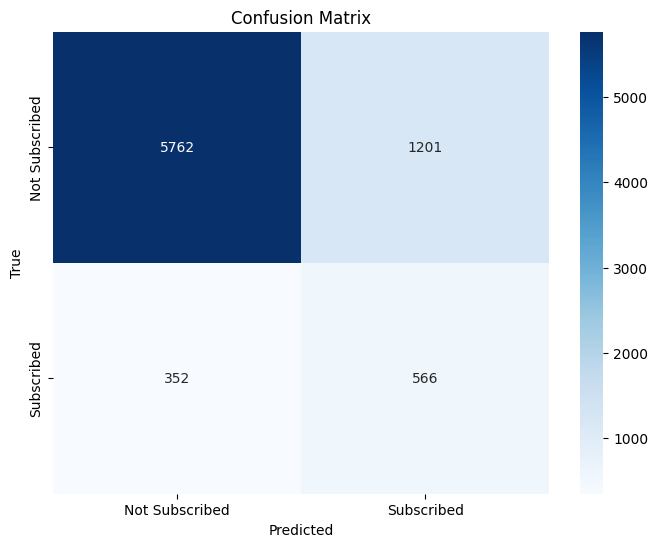

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix_custom(y_true, y_pred, classes, cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example for Random Forest
plot_confusion_matrix_custom(y_test, y_pred, classes=['Not Subscribed', 'Subscribed'])


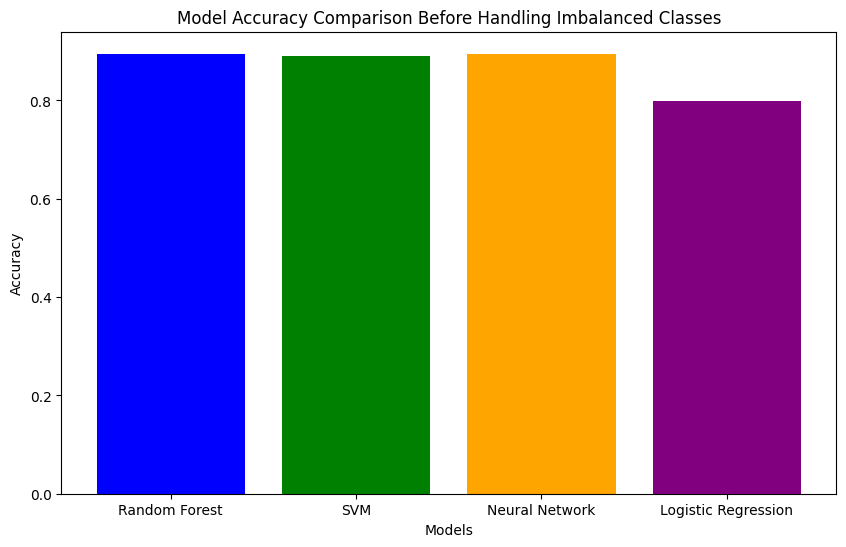

Model: Random Forest

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.64      0.21      0.32       918

    accuracy                           0.89      7881
   macro avg       0.77      0.60      0.63      7881
weighted avg       0.87      0.89      0.87      7881

----------------------------------------------
Model: SVM

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6963
           1       0.60      0.19      0.29       918

    accuracy                           0.89      7881
   macro avg       0.75      0.59      0.62      7881
weighted avg       0.87      0.89      0.87      7881

----------------------------------------------
Model: Neural Network

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6963
           1       0.63      0.24      0.35       918

    accuracy                   

In [73]:
import matplotlib.pyplot as plt

# List of models and their corresponding accuracy scores
models = ['Random Forest', 'SVM', 'Neural Network', 'Logistic Regression']
accuracy_scores = [accuracy, accuracy_svm, accuracy_nn, accuracy_after_lr]

# Create a bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before Handling Imbalanced Classes')
plt.show()

# Visualize classification report comparison
classification_reports = [classification_rep, classification_rep_svm, classification_rep_nn, classification_rep_after_lr]

for model, report in zip(models, classification_reports):
    print(f"Model: {model}\n")
    print(report)
    print("----------------------------------------------")

# Confusion matrix comparison
confusion_matrices = [conf_matrix, conf_matrix_svm, conf_matrix_nn, conf_matrix_after_lr]

for model, matrix in zip(models, confusion_matrices):
    print(f"Model: {model}\n")
    print(matrix)
    print("----------------------------------------------")


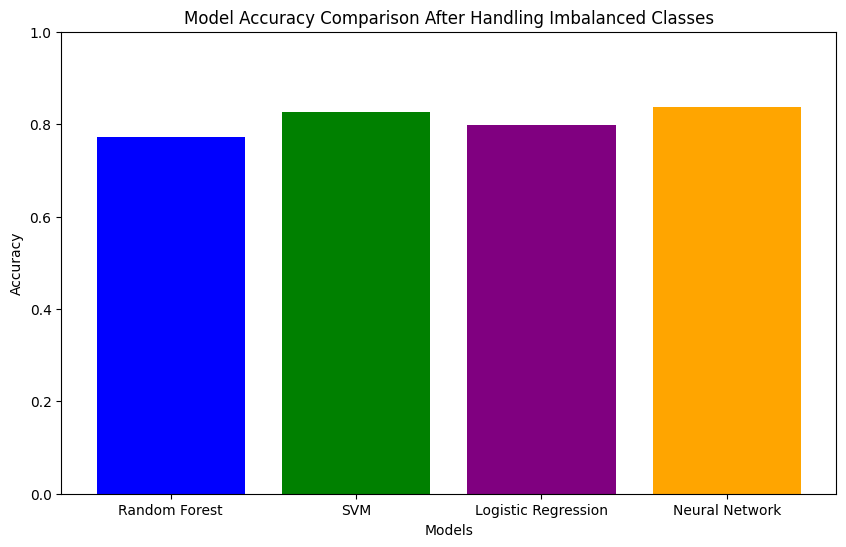

In [74]:
import matplotlib.pyplot as plt

# List of models and their corresponding accuracy scores
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
accuracy_scores = [accuracy_after, accuracy_after_svm, accuracy_after_lr, accuracy_nn_after]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison After Handling Imbalanced Classes')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy values
plt.show()


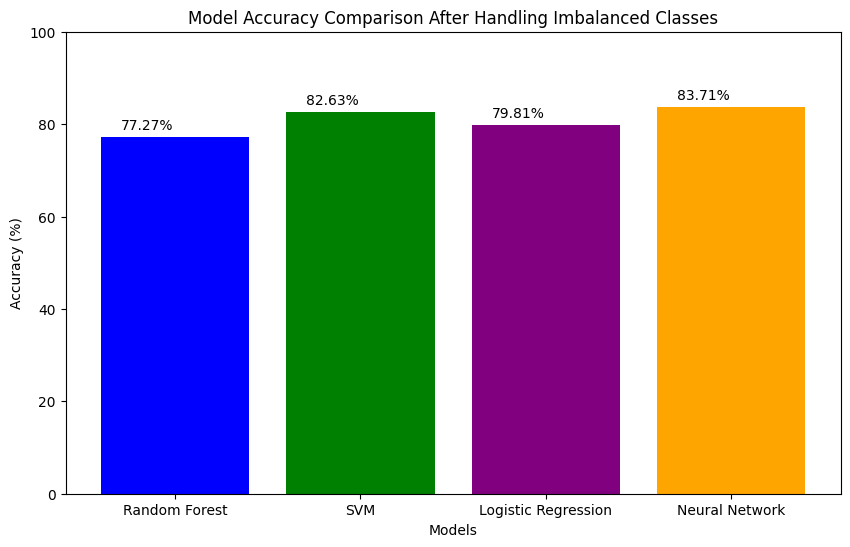

In [75]:
import matplotlib.pyplot as plt

# List of models and their corresponding accuracy scores
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
accuracy_scores = [accuracy_after, accuracy_after_svm, accuracy_after_lr, accuracy_nn_after]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_percentages, color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison After Handling Imbalanced Classes')
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100 for percentage values

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, accuracy_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.show()
